# Guião Laboratorial: Redes Neuronais

Este trabalho laboratorial tem por objetivo usar classificadores baseados em redes neuronais.


# Conteúdo
- [ 1 - Bibliotecas ](#1)
- [ 2 - Redes Neuronais](#2)
  - [ 2.1 Definição do Problema](#2.1)
  - [ 2.2 Dataset](#2.2)
  - [ 2.3 Representação do Modelo](#2.3)
  - [ 2.4 Implementação do Modelo em Tensorflow](#2.4)
    - [ Exercício 1](#ex01)
- [ 3 - Sistema SERT](#3)
  - [ 3.1 Bibliotecas](#3.1)
  - [ 3.2 Dados de Treino](#3.2)
   - [ Exercise 2](#ex02)
  - [ 3.3 Leitura dos Dados](#3.3)
  - [ 3.4 Processamento dos Dados](#3.4)
  - [ 3.5 Treino - Caso 1](#3.5)
  - [ 3.6 Treino - Caso 2](#3.6)
  - [ 3.7 Validação](#3.7)
    - [ Exercise 3](#ex03)

<a name="1"></a>
## 1 - Bibliotecas

Carregar as bibliotecas para a realização do trabalho.
- [numpy](https://numpy.org/) - biblioteca fundamental para a computação científica com Python.
- [matplotlib](http://matplotlib.org) - biblioteca popular para esboçar gráficos em Python.
- [tensorflow](https://www.tensorflow.org/) - _framework_ popular para _machine learning_

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

**Tensorflow and Keras**  
Tensorflow é uma biblioteca para _machine learning_ desenvolvido pelo Google. Em 2019, o Google integrou Keras ao Tensorflow e lançou o Tensorflow 2.0. Keras é uma _framework_ desenvolvida de forma independente por François Chollet que cria uma interface simples e centrada em camadas para o Tensorflow.

<a name="2"></a>
## 2 - Redes Neuronais

Para aplicações complexas como reconhecimento de imagens, as redes neuronais são preferíveis.

<a name="2.1"></a>
### 2.1 Formulação do Problema

Neste exercício, irá ser usada uma rede neuronal para reconhecer dois dígitos manuscritos, zero e um. Esta é uma tarefa de classificação binária. O reconhecimento automatico de dígitos manuscritos é amplamente utilizado hoje em dia - desde o reconhecimento de códigos postais (códigos postais) em envelopes de correio até o reconhecimento de valores escritos em cheques bancários. 

<a name="2.2"></a>
### 2.2 _Dataset_

- O código abaixo carrega os dados nas variáveis `X` e `y`


- O conjunto de dados contém 1000 exemplos de treino de dígitos manuscritos, aqui limitados a zero e um.

     - Cada exemplo de treino é uma imagem do dígito em escala de cinzentos de 20 pixéis x 20 pixéis.
         - Cada pixel é representado por um número em vírgula flutuante que indica a intensidade da escala de cinzentos naquela posição.
         - A grelha de pixéis de 20 por 20 é transformada em um vetor de dimensão 400.
         - Cada exemplo de treino converte-se numa única linha na matriz de dados `X`.
         - Isto dá-nos uma matriz `X` de 1000 x 400, onde cada linha é um exemplo de treino de uma imagem de dígito manuscrita.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- A segunda parte do conjunto de treino é um vetor `y` de dimensão 1000 x 1 que contém rótulos para o conjunto de treino
     - `y = 0` se a imagem for do dígito `0`, `y = 1` se a imagem for do dígito `1`.

In [ ]:
# Carregar dataset
X = np.load("X.npy")
y = np.load("y.npy")
X = X[0:1000]
y = y[0:1000]

#### 2.2.1 Visualizar as variáveis
O código abaixo mostra os elementos das variáveis `X` e `y`.  

In [ ]:
print ('O primeiro elemento de X é: ', X[0])

O primeiro elemento de X é:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

In [ ]:
print ('O primeiro elemento de y é: ', y[0,0])
print ('O último elemento de y é: ', y[-1,0])

O primeiro elemento de y é:  0
O último elemento de y é:  1


#### 2.2.2 Verificar as dimensões das variáveis

O código abaixo mostra as dimensões de `X` e `y` e indica quantos exemplos de treino possui o _dataset_.

In [ ]:
print ('A dimensão de X é: ' + str(X.shape))
print ('A dimensão de y é: ' + str(y.shape))

A dimensão de X é: (1000, 400)
A dimensão de y é: (1000, 1)


<a name="toc_89367_2.2.3"></a>
#### 2.2.3 Visualização dos Dados

Irá ser visualizado somente uma parte do conjunto de treino.
- Na célula abaixo, o código seleciona aleatoriamente 64 linhas de `X`, mapeia cada linha de volta para uma imagem em escala de cinzentos de 20 por 20 pixéis e exibe as imagens juntas.
- O rótulo de cada imagem é exibido acima da imagem

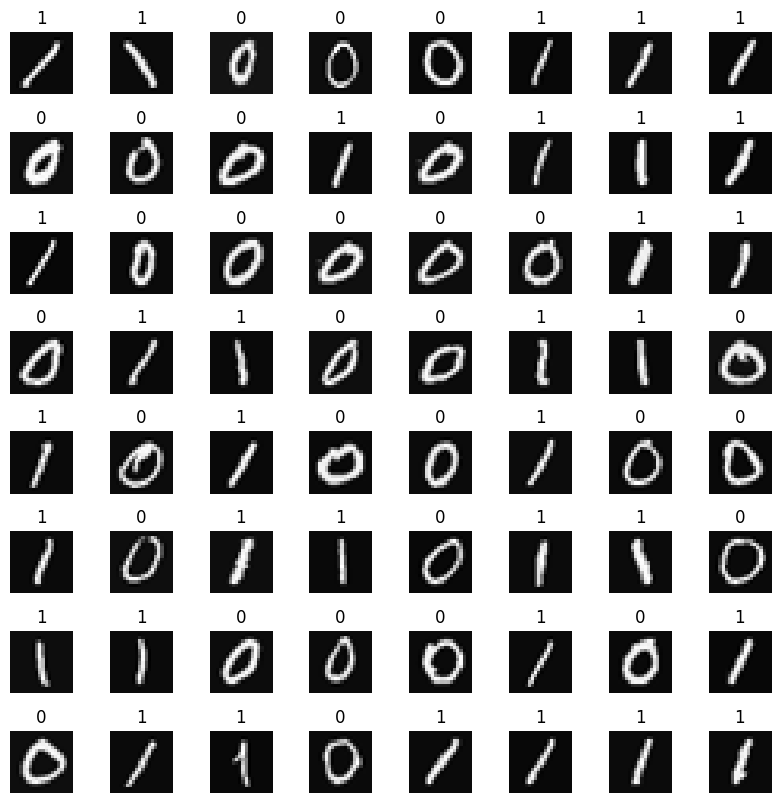

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

<a name="2.3"></a>
### 2.3 Representação do modelo

- A rede neuronal possui três camadas densas com ativações sigmoides.
     - Relembrar que as entradas são valores de pixéis de imagens de dígitos.
     - Como as imagens têm tamanho $20\times20$, isso dá-nos $400$ entradas
- Os parâmetros têm dimensões dimensionadas para uma rede neuronal com $25$ unidades na camada 1, $15$ unidades na camada 2 e $1$ unidade de saída na camada 3.

     - Relembrar que as dimensões destes parâmetros são determinadas da seguinte forma:
         - Se a rede tiver $s_{in}$ unidades em uma camada e $s_{out}$ unidades na próxima camada, então
             - $W$ terá a dimensão $s_{in} \times s_{out}$.
             - $b$ será um vetor com $s_{out}$ elementos
  
     - Portanto, as dimensões de `W` e `b` são
         - layer1: A dimensão de `W1` é (400, 25) e a dimensão de `b1` é (25,)
         - layer2: A dimensão de `W2` é (25, 15) e a dimensão de `b2` é: (15,)
         - layer3: A dimensão de `W3` é (15, 1) e a dimensão de `b3` é: (1,)
>**Nota:** O vetor de polarizações `b` pode ser representado como uma matriz 1-D (n,) ou 2-D (n,1). O Tensorflow utiliza uma representação 1-D, a qual será mantida neste trabalho.               

<a name="2.4"></a>
### 2.4 Implementação do Modelo em Tensorflow

Os modelos Tensorflow são construídos camada por camada. As dimensões de entrada de uma camada ($s_{in}$ acima) já são calculados. Só é necessário especificar as *dimensões de saída* de uma camada e isso determina a dimensão de entrada da próxima camada. A dimensão de entrada da primeira camada é derivada do tamanho dos dados de entrada especificados na função `model.fit` mostrada abaixo.
>**Nota:** Também é possível adicionar uma camada de entrada que especifique a dimensão de entrada da primeira camada. Por exemplo: `tf.keras.Input(shape=(400,)), #especifica a dimensão de entrada`

<a name="ex01"></a>
### Exercício 1

Construa a rede neuronal acima descrita usando Keras [Sequential model](https://keras.io/guides/sequential_model/) e [Dense Layer](https://keras.io/api/layers/core_layers/dense/) com uma ativação sigmoide.

In [ ]:
# Modelo sequencial

model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #especifica a dimensão de entrada
        ### START CODE HERE ### 
        Dense(25, activation='sigmoid'), #primeira camada oculta
        Dense(15, activation='sigmoid'), #segunda camada oculta
        Dense(1, activation='sigmoid')   #camada de saída

        
        
        
        
        ### END CODE HERE ### 
    ], name = "modelo" 
)                            


In [ ]:
model.summary()

Model: "modelo"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


As contagens de parâmetros mostradas no resumo correspondem ao número de elementos nas matrizes de pesos e polarizações conforme mostrado abaixo.

In [ ]:
L1_num_params = 400 * 25 + 25  # parâmetros W1  + parâmetros b1 
L2_num_params = 25 * 15 + 15   # parâmetros W2  + parâmetros b2 
L3_num_params = 15 * 1 + 1     # parâmetros W3  + parâmetros b3 
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


Vamos examinar mais detalhadamente os pesos para verificar se o tensorflow produziu as mesmas dimensões que as calculadas acima.

In [ ]:
[layer1, layer2, layer3] = model.layers

In [ ]:
#### Verifique as dimensões dos pesos
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"Dimensão W1 = {W1.shape}, Dimensão b1 = {b1.shape}")
print(f"Dimensão W2 = {W2.shape}, Dimensão b2 = {b2.shape}")
print(f"Dimensão W3 = {W3.shape}, Dimensão b3 = {b3.shape}")

Dimensão W1 = (400, 25), Dimensão b1 = (25,)
Dimensão W2 = (25, 15), Dimensão b2 = (15,)
Dimensão W3 = (15, 1), Dimensão b3 = (1,)


**Saída Esperada**
```
Dimensão W1 = (400, 25), Dimensão b1 = (25,)  
Dimensão W2 = (25, 15),Dimensão  b2 = (15,)  
Dimensão W3 = (15, 1), Dimensão b3 = (1,)
```

`xx.get_weights` retorna uma matriz NumPy. Também é possível acessar os pesos diretamente na sua forma tensorial. Observe a dimensão dos tensores na camada final.

In [ ]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.34917897],
       [ 0.02276289],
       [-0.57766235],
       [-0.30232948],
       [-0.282663  ],
       [ 0.47478908],
       [-0.4094593 ],
       [-0.1307014 ],
       [-0.37779504],
       [ 0.36372536],
       [-0.20340082],
       [ 0.40112323],
       [ 0.29273283],
       [ 0.5473706 ],
       [ 0.5723676 ]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


O código a seguir define uma função de perda (*loss*) e executa a descida gradiente para ajustar os pesos do modelo aos dados de treino. 

In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 2s 3ms/step - loss: 0.6306
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.4713
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.3109
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 0.2045
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1447
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.1089
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0861
Epoch 8/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0705
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0590
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0505
Epoch 11/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0437
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0387
Epoch 13/20
32/32 [==============================

Para executar o modelo em um exemplo para fazer uma previsão, use [Keras `predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model). A entrada para `predict` é uma matriz, portanto o exemplo único é redimensionado para ser bidimensional.

In [ ]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" Previsão a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a um
print(f" Previsão a um:  {prediction}")

1/1 [==============================] - 0s 186ms/step
 Previsão a zero: [[0.01640666]]
1/1 [==============================] - 0s 42ms/step
 Previsão a um:  [[0.988424]]


A saída do modelo é interpretada como uma probabilidade. No primeiro exemplo acima, a entrada é zero. O modelo prevê que a probabilidade de a entrada ser um é quase zero. No segundo exemplo, a entrada é um. O modelo prevê que a probabilidade de a entrada ser um é quase um. De seguida, a probabilidade é comparada a um limiar (_threshold_) para fazer uma previsão final.

In [ ]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"Previsão após ´threshold´: {yhat}")

Previsão após ´threshold´: 1


Vamos agora comparar as previsões com os rótulos para uma amostra aleatória de 64 dígitos. Isto pode demorar a ser executado.

1/1 [==============================] - 0s 33ms/step


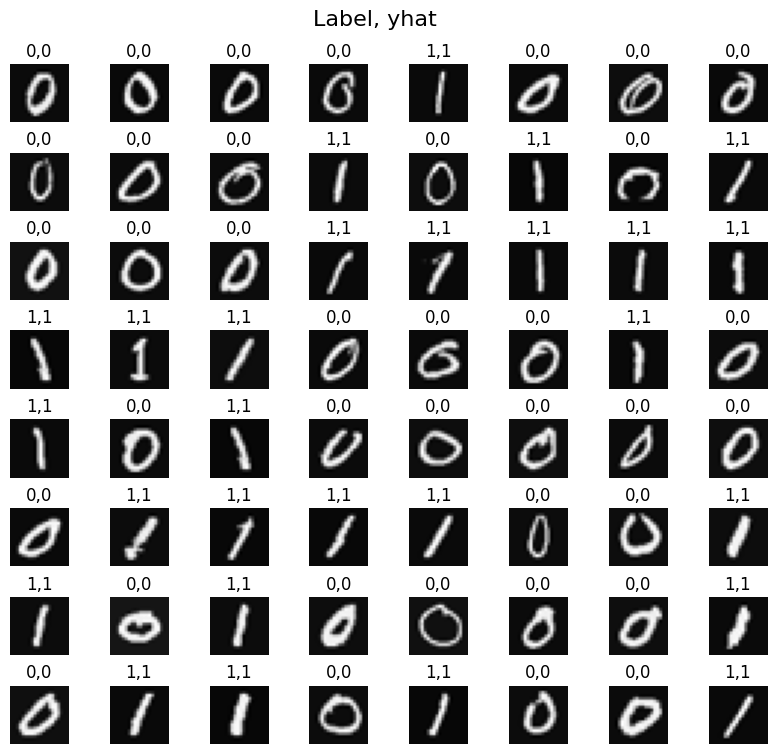

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

<a name="3"></a>
# 3 - Sistema SERT




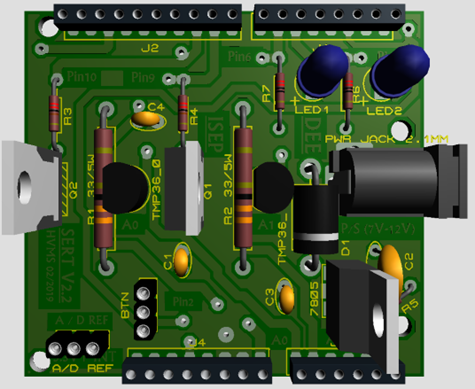



Com um classificador supervisionado, pode-se observar os dados do sensor e treiná-lo para classificar quando o sistema está ON ou OFF. A seguir, pode-se aplicar o classificador a novos dados vindo do sistema térmico.

<a name="3.1"></a>
### 3.1 Bibliotecas
Carregue as bibilotecas abaixo para esta segunda parte com o sistema SERT.

In [ ]:
# Bibliotecas processamento e visualização
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import time

# bibliotecas classificação
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pyfirmata import Arduino, util

<a name="3.2"></a>
### 3.2 Dados de Treino
Gerar os dados a partir do sistema SERT, ligando (ON) e desligando (OFF) o sistema térmico S1 durante durações diferentes. Os dados devem ser obtidos utilizando um período de amostragem de 1 segundo.

Deve gerar 20 minutos de dados para treinar um classificador que detete se o sistema térmico S1 (`T1`) está a ON ou OFF.

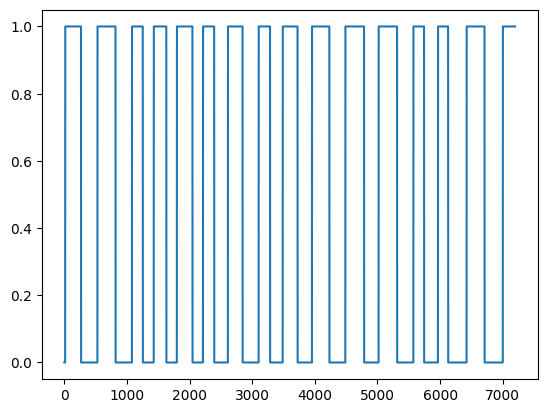

In [ ]:
# Tempo total em minutos
run_time = 120.0

# 1 ciclo por segundo
ciclos = int(60.0*run_time)

# Array dos tempos
tm = np.array(range(ciclos)).astype(float)

# Gerar entradas ON/OFF para o sistema 1 (S1) ###
T1 = np.zeros(ciclos)

end = 15 # Colocar os primeiros 15 segundos  de T1 a zero
on = False
while end <= ciclos:
    start = end
    end += random.randint(150,300) # Manter o novo T1 para intervalos diferentes
    on = not on
    if on:
        T1[start:end] = 1
    else:
        T1[start:end] = 0
        
plt.plot(T1);

<a name="ex02"></a>
### Exercício 2
Usando o sinal acima gerado, aplique ao sistema 1 (`T1`) somente 80% PWM de forma a evitar sobreaquecimento. Obtenha a temperatura do sistema S1 a cada 1 segundo durante 20 minutos, conforme referido acima. Guarde os valores de tempo (`t`), temperatura do sensor 1 (`T_S1`) e estado do sistema 1 (`T1`: 1 para ON e 0 para OFF) num _dataframe_ e coloque os dados em ficheiro `.txt` ou `.csv`, usando o nome `train_dados.csv`.

In [ ]:
board = Arduino('COM5')

iterator = util.Iterator(board)
iterator.start()

# Entradas analógicas
T_S1 = board.get_pin('a:0:i') # A0

# Saídas PWM
S1 = board.get_pin('d:10:p')  # Pino 10

time.sleep(1)

# Função de conversão
def TEMP(val):
    return (val*5000.0-500.0)/10.0

# Funções temperaturas
def Temperatura():
    return TEMP(T_S1.read())


u1 = 0.8*T1 # 80% PWM 
temp1 = np.zeros(ciclos)    

for i in range(ciclos):
    S1.write(u1[i])
    # ler temperatura
    temp1[i] = Temperatura()
    print(str(u1[i])+'   '+str(temp1[i]))
    time.sleep(1)

# desligar S1
S1.write(0.0)   
board.exit() # termina comunicação com placa

dados = np.vstack((tm,temp1,u1/0.8)).T
np.savetxt('train_dados_2h.csv',dados,delimiter=',',\
        header='t,T_S1,T1',comments='')

0.0   29.20000000000001
0.0   28.70000000000001
0.0   28.70000000000001
0.0   28.70000000000001
0.0   28.2
0.0   28.2
0.0   28.2
0.0   27.7
0.0   27.7
0.0   27.2
0.0   27.2
0.0   27.2
0.0   26.75
0.0   26.75
0.0   26.75
0.8   26.75
0.8   26.75
0.8   27.2
0.8   27.7
0.8   28.70000000000001
0.8   29.65
0.8   30.15
0.8   31.15
0.8   32.10000000000001
0.8   32.60000000000001
0.8   33.59999999999999
0.8   34.55
0.8   35.55
0.8   36.499999999999986
0.8   36.999999999999986
0.8   38.0
0.8   38.45
0.8   39.45
0.8   39.95
0.8   40.9
0.8   41.4
0.8   42.4
0.8   42.85
0.8   43.85
0.8   44.35
0.8   44.8
0.8   45.8
0.8   46.3
0.8   46.75
0.8   47.75
0.8   48.25
0.8   48.75
0.8   49.2
0.8   49.7
0.8   50.2
0.8   50.7
0.8   51.65
0.8   52.15
0.8   52.15
0.8   52.65
0.8   53.15
0.8   53.6
0.8   54.1
0.8   54.6
0.8   55.1
0.8   55.55
0.8   56.05
0.8   56.05
0.8   56.55
0.8   57.05
0.8   57.55
0.8   57.55
0.8   58.0
0.8   58.5
0.8   59.0
0.8   59.5
0.8   59.5
0.8   59.95
0.8   60.45
0.8   60.95
0.8   60

Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.7_3.7.2544.0_x64__qbz5n2kfra8p0\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\vasco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pyfirmata\util.py", line 55, in run
    self.board.iterate()
  File "C:\Users\vasco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pyfirmata\pyfirmata.py", line 282, in iterate
    received_data.append(ord(self.sp.read()))
  File "C:\Users\vasco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\serial\serialwin32.py", line 285, in read
    ctypes.byref(self._overlapped_read))
TypeError: byref() argument must be a ctypes instance, not 'NoneType'



<a name="3.3"></a>
### 3.3 Leitura dos Dados
Importe os dados gravados em ficheiro ou use o _dataframe_ criado.

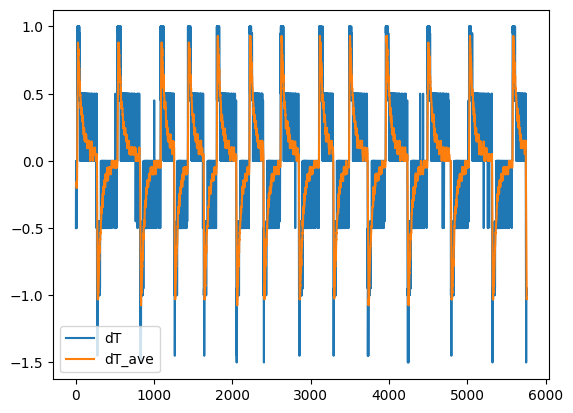

In [ ]:
# Leitura dos dados de treino
df = pd.read_csv('train_dados_2h.csv')

# Aplique a média móvel para filtrar (e.g. suavizar) os dados de temperatura
df['T1_S1_ave'] = df['T_S1'].rolling(10).mean()

# Divida em datasets em treino e validação
train, val = train_test_split(df, test_size=0.2, shuffle=False)
train = train.copy(deep=True)
val = val.copy(deep=True)

# Diferença para a média móvel
train['dT'] = train['T_S1'].diff()
train['dT_ave'] = train['T1_S1_ave'].diff()
train[['dT','dT_ave']].plot();

<a name="3.4"></a>
### 3.4 Processamento dos Dados
Na maioria das vezes, os dados devem ser sempre escalodos em aplicações de machine learning. Isto pode ser feito através do `MinMaxScaler` do [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Verifique também se o formato dos dados está correto para o modelo, por exemplo, se a dimensão do _array_ `Numpy` coincide com a do classificador.

In [ ]:
# Divida os dados de entrada e de saída
Xtrain = train[['T_S1']].values
ytrain = train[['T1']].values
print(Xtrain.shape)
print(ytrain.shape)

# Formatação da dimensão dos dados de y para remover warning
ytrain = np.ravel(ytrain)

# Escalar
s = MinMaxScaler()
Xtrain_s = s.fit_transform(Xtrain)

(5760, 1)
(5760, 1)


<a name="3.5"></a>
### 3.5 Treino - Caso 1
Use os dados para treinar um classificador de rede neuronal usando somente os dados de temperatura.

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam',alpha=1e-5,max_iter=200,\
       activation='relu',hidden_layer_sizes=(10,30,10),\
       random_state=1, shuffle=True) # Neural Network

clf.fit(Xtrain_s,ytrain)
yp = clf.predict(Xtrain_s)
train['NN_prev'] = yp

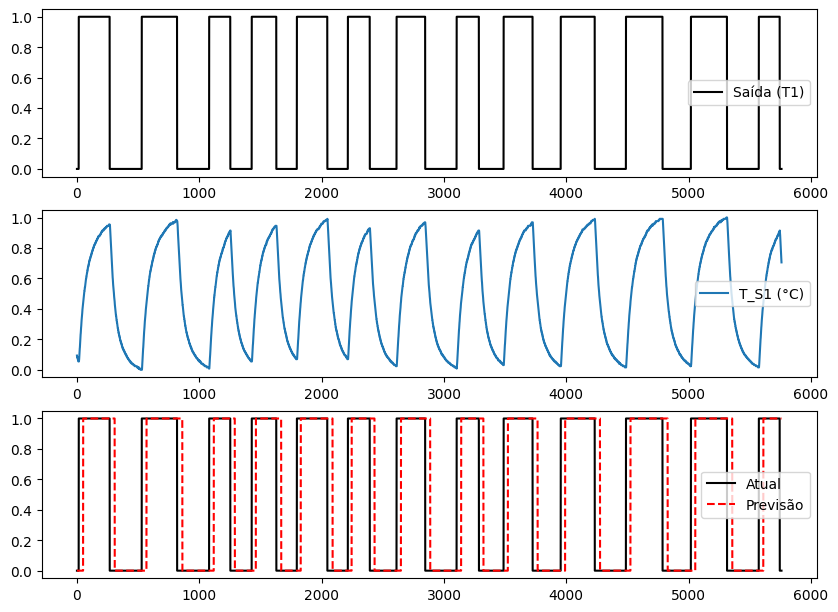

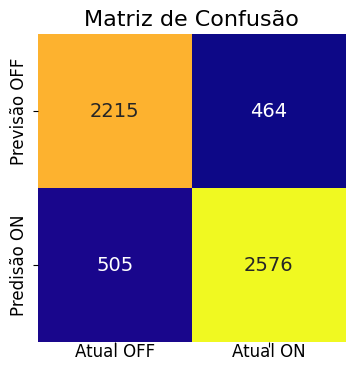

In [ ]:
# Gráficos dos resultados
plt.figure(figsize=(10,10))
# Saída
plt.subplot(4,1,1)
plt.plot(ytrain,'k-',label='Saída (T1)')
plt.legend()

# Entradas
plt.subplot(4,1,2)
plt.plot(Xtrain_s,label='T_S1 (°C)')
plt.legend()

# Gráfico da previsão
plt.subplot(4,1,3)
plt.plot(train['T1'],'k-',label='Atual')
plt.plot(train['NN_prev'],'r--',label='Previsão')
plt.legend()

# Matriz de confusão 
plt.figure(figsize=(15,4))
confusion = metrics.confusion_matrix(yp,ytrain) 
plt.title('Matriz de Confusão',size=16)
ax = sns.heatmap(confusion, annot=True, cmap='plasma',square=True,cbar=False,fmt='g',annot_kws={"size": 14})
ax.set_xticklabels(['Atual OFF','Atual ON'],va='center',size=12)
ax.set_yticklabels(['Previsão OFF','Predisão ON'],va='center',size=12);

<a name="3.6"></a>
### 3.6 Treino - Caso 2
Pode-se criar _features_ adicionais para melhorar o desempenho do algoritmo de _machine learning_.
Use os dados para treinar a rede usando a taxa de variação de temperatura. Para isso, execute os os passos:
1. Criar uma nova _feature_ para o classificador (primeira derivada da temperatura)
2. Escalar os dados de entrada (os dados de saída continuam 0 ou 1)
3. Fazer a previsão usando o classificador de rede neuronal
4. Esboçar as previsões para verificar o desempenho

In [ ]:
# Adicione a variação da temperatura como nova feature
train['dT'] = train['T1_S1_ave'].diff()

# Elimine colunas vazias e inicia índice
train.dropna(inplace=True)
train.reset_index(drop=True,inplace=True)

# Dados de entrada e saída para a NN
Xtrain = np.array(train[['T_S1','dT']])
ytrain = np.array(train[['T1']])

# Formatação da dimensão dos dados de y para remover warning
ytrain = np.ravel(ytrain)

# Escalar
s = MinMaxScaler()
Xtrain_s = s.fit_transform(Xtrain)

clf = MLPClassifier(solver='adam',alpha=1e-5,max_iter=200,\
       activation='relu',hidden_layer_sizes=(10,30,10),\
       random_state=1, shuffle=True) # Neural Network

clf.fit(Xtrain_s,ytrain)
yp = clf.predict(Xtrain_s)
train['NN_prev'] = yp


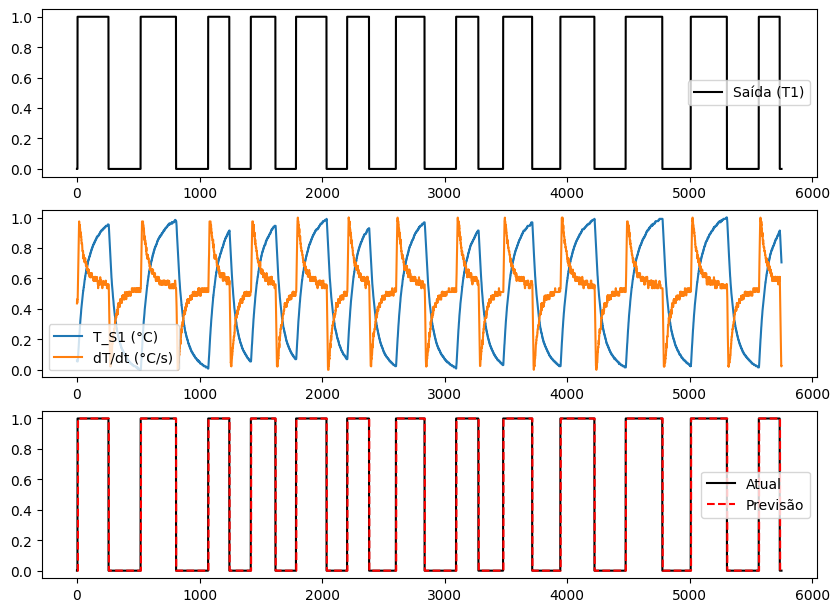

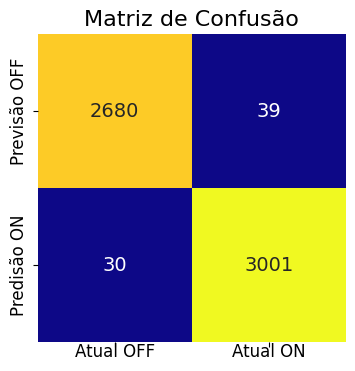

In [ ]:
# Gráficos dos resultados
plt.figure(figsize=(10,10))
# Saída
plt.subplot(4,1,1)
plt.plot(ytrain,'k-',label='Saída (T1)')
plt.legend()

# Entradas
plt.subplot(4,1,2)
plt.plot(Xtrain_s,label=['T_S1 (°C)', 'dT/dt (°C/s)'])
plt.legend()

# Gráfico da previsão
plt.subplot(4,1,3)
plt.plot(train['T1'],'k-',label='Atual')
plt.plot(train['NN_prev'],'r--',label='Previsão')
plt.legend()

# Matriz de confusão 
plt.figure(figsize=(15,4))
confusion = metrics.confusion_matrix(yp,ytrain) 
plt.title('Matriz de Confusão',size=16)
ax = sns.heatmap(confusion, annot=True, cmap='plasma',square=True,cbar=False,fmt='g',annot_kws={"size": 14})
ax.set_xticklabels(['Atual OFF','Atual ON'],va='center',size=12)
ax.set_yticklabels(['Previsão OFF','Predisão ON'],va='center',size=12);

<a name="3.7"></a>
### 3.7 Validação
Teste o desempenho classificador em novos dados. Pode gerar novos dados a aprtir do sistema térmico, ou usar a função `train_test_split` do [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
Para isso, execute os mesmos passos de processamento:
1. Criar uma nova _feature_ para o classificador (primeira derivada da temperatura)
2. Escalar os dados de entrada (os dados de saída continuam 0 ou 1)
3. Fazer a previsão usando o classificador de rede neuronal
4. Esboçar as previsões para verificar o desempenho

In [ ]:
# Adicione a variação da temperatura como nova feature
val['dT'] = val['T1_S1_ave'].diff()
val.dropna(inplace=True)
val.reset_index(drop=True,inplace=True)

# Dados de entrada e saída para a NN
Xval = np.array(val[['T_S1','dT']])
yval = np.array(val[['T1']])

# Formatação da dimensão dos dados de y para remover warning
yval = np.ravel(yval)

# Escalar
s = MinMaxScaler()
Xval_s = s.fit_transform(Xval)

clf = MLPClassifier(solver='adam',alpha=1e-5,max_iter=200,\
       activation='relu',hidden_layer_sizes=(10,30,10),\
       random_state=1, shuffle=True) # Rede neuronal

clf.fit(Xval_s,yval)

# Calcula previsão e guarda no dataframe
yp = clf.predict(Xval_s)
val['NN_prev'] = yp

C:\Users\vasco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


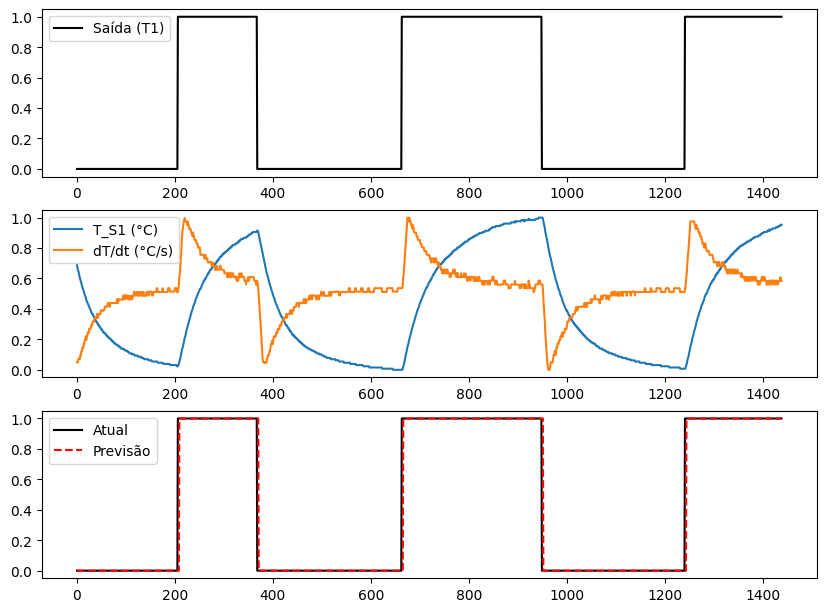

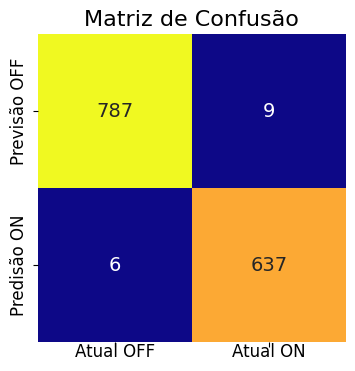

In [ ]:
# Gráficos dos resultados
plt.figure(figsize=(10,10))
# Saída
plt.subplot(4,1,1)
plt.plot(yval,'k-',label='Saída (T1)')
plt.legend()

# Entradas
plt.subplot(4,1,2)
plt.plot(Xval_s,label=['T_S1 (°C)', 'dT/dt (°C/s)'])
plt.legend()

# Gráfico da previsão
plt.subplot(4,1,3)
plt.plot(val['T1'],'k-',label='Atual')
plt.plot(val['NN_prev'],'r--',label='Previsão')
plt.legend()

# Matriz de confusão 
plt.figure(figsize=(15,4))
confusion = metrics.confusion_matrix(yp,yval) 
plt.title('Matriz de Confusão',size=16)
ax = sns.heatmap(confusion, annot=True, cmap='plasma',square=True,cbar=False,fmt='g',annot_kws={"size": 14})
ax.set_xticklabels(['Atual OFF','Atual ON'],va='center',size=12)
ax.set_yticklabels(['Previsão OFF','Predisão ON'],va='center',size=12);

<a name="ex03"></a>
### Exercício 3
Pode-se introduzir ainda mais _features_, tais como a segunda derivada da temperatura. Para isso, execute as mesmas etapas anteriores:
1. Criar uma nova _feature_ para o classificador (segunda derivada da temperatura)
2. Escalar os dados de entrada (os dados de saída continuam 0 ou 1)
3. Treinar o classificador de rede neuronal
4. Fazer a previsão usando a rede neuronal treinada
5. Esboçar as previsões para verificar o desempenho

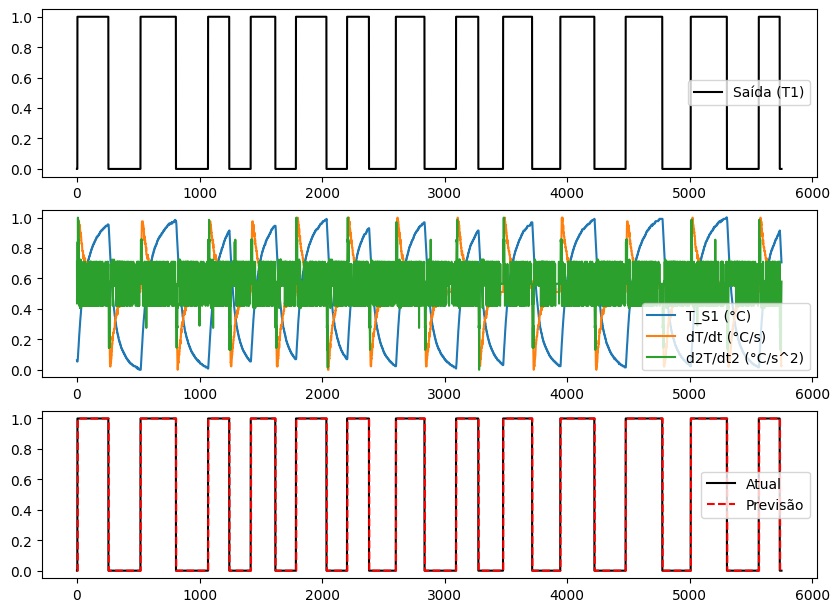

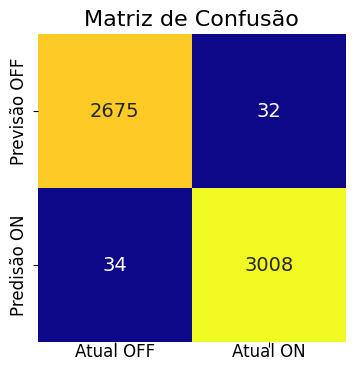

In [ ]:
# Adicione a segunda derivada da temperatura como nova feature
train['d2T'] = train['dT'].diff()
train.dropna(inplace=True)
train.reset_index(drop=True,inplace=True)

# Dados de entrada e saída para a NN
Xtrain = np.array(train[['T_S1','dT','d2T']])
ytrain = np.array(train[['T1']])

# Formatação da dimensão dos dados de y para remover warning
ytrain = np.ravel(ytrain)

# Escalar
s = MinMaxScaler()
Xtrain_s = s.fit_transform(Xtrain)

clf = MLPClassifier(solver='adam',alpha=1e-5,max_iter=200,\
    activation='relu',hidden_layer_sizes=(10,30,10),\
    random_state=1, shuffle=True) # Neural Network

clf.fit(Xtrain_s,ytrain)
yp = clf.predict(Xtrain_s)
train['NN_prev'] = yp

# Gráficos dos resultados
plt.figure(figsize=(10,10))
# Saída
plt.subplot(4,1,1)
plt.plot(ytrain,'k-',label='Saída (T1)')
plt.legend()

# Entradas
plt.subplot(4,1,2)
plt.plot(Xtrain_s,label=['T_S1 (°C)', 'dT/dt (°C/s)', 'd2T/dt2 (°C/s^2)'])
plt.legend()

# Gráfico da previsão
plt.subplot(4,1,3)
plt.plot(train['T1'],'k-',label='Atual')
plt.plot(train['NN_prev'],'r--',label='Previsão')
plt.legend()

# Matriz de confusão 
plt.figure(figsize=(15,4))
confusion = metrics.confusion_matrix(yp,ytrain) 
plt.title('Matriz de Confusão',size=16)
ax = sns.heatmap(confusion, annot=True, cmap='plasma',square=True,cbar=False,fmt='g',annot_kws={"size": 14})
ax.set_xticklabels(['Atual OFF','Atual ON'],va='center',size=12)
ax.set_yticklabels(['Previsão OFF','Predisão ON'],va='center',size=12);
